In [7]:
import pandas as pd

# Load the dataset using a raw string or double backslashes
df = pd.read_csv('c:\\Users\\thobi\\Downloads\\archive\\StudentsPerformance.csv')

# Inspect the first few rows
print(df.head())
print(df.info())

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtyp

In [15]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])
print(df.dtypes)
df.dropna(inplace=True)
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# If you find duplicates, drop them
if duplicates > 0:
    df.drop_duplicates(inplace=True)

Series([], dtype: int64)
gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object
Number of duplicate rows: 0


# Question 1: Does test preparation improve scores?
## Analysis Steps:
* Group Data: Split the dataset into two groups: those who completed the test preparation course and those who did not.
* Calculate Averages:
For each group, calculate average scores in math, reading, and writing.
* Compare Results:
Use a visual representation (e.g., bar chart) to show differences.

                         math score  reading score  writing score
test preparation course                                          
completed                 69.695531      73.893855      74.418994
none                      64.077882      66.534268      64.504673


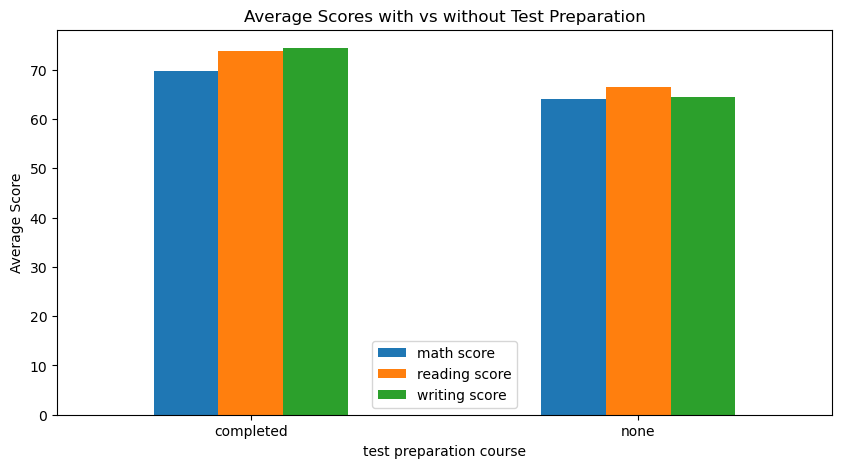

In [21]:
preparation_stats = df.groupby('test preparation course')[['math score', 'reading score', 'writing score']].mean()
print(preparation_stats)

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

preparation_stats.plot(kind='bar', figsize=(10, 5))
plt.title('Average Scores with vs without Test Preparation')
plt.ylabel('Average Score')
plt.xticks(rotation=0)
plt.show()

# Question 2: Are there performance gaps across subjects?
## Analysis Steps:

* Calculate Averages:
Calculate the average scores for math, reading, and writing.
* Visualize:
Use a bar chart to compare the average scores.

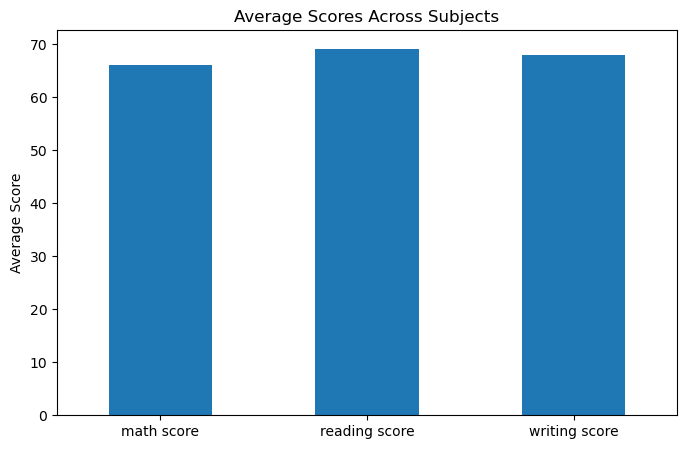

In [24]:
subject_averages = df[['math score', 'reading score', 'writing score']].mean()
subject_averages.plot(kind='bar', figsize=(8, 5))
plt.title('Average Scores Across Subjects')
plt.ylabel('Average Score')
plt.xticks(rotation=0)
plt.show()

# Question 3: Does parental education level correlate with performance?
## Analysis Steps:

* Group Data: Group the data by parental education level.
* Calculate Averages:
Compute average scores for each education level.
* Visualize:
Use a boxplot to show score distributions across different education levels.

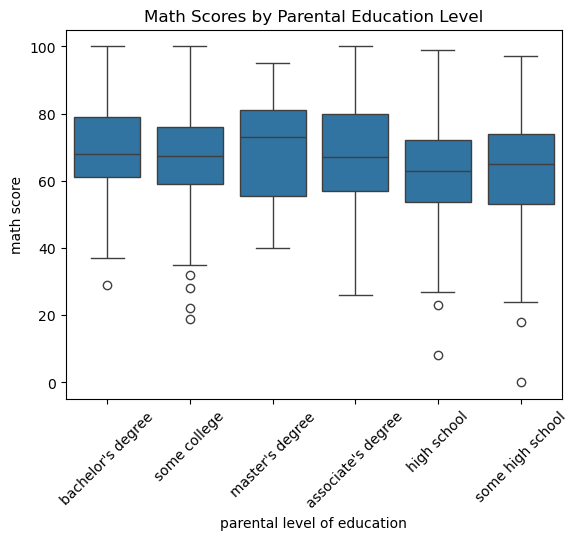

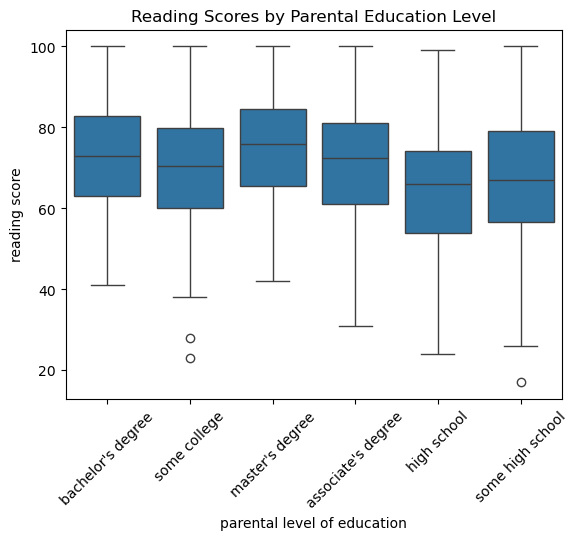

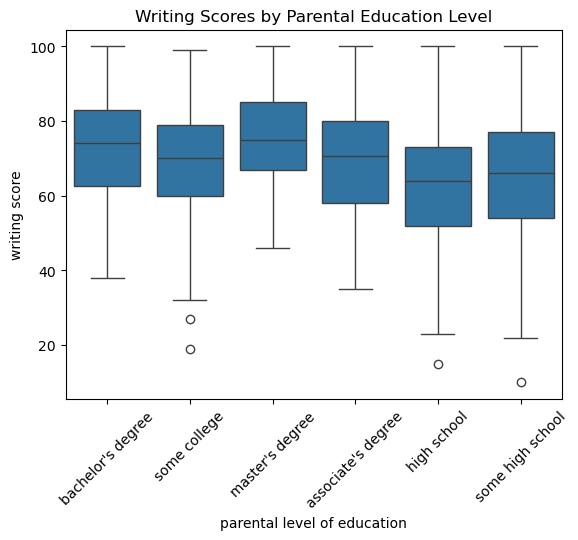

In [35]:
education_performance = df.groupby('parental level of education')[['math score', 'reading score', 'writing score']].mean()

# Create a boxplot for one subject as an example
sns.boxplot(x='parental level of education', y='math score', data=df)
plt.title('Math Scores by Parental Education Level')
plt.xticks(rotation=45)
plt.show()
# Create a boxplot for one subject as an example
sns.boxplot(x='parental level of education', y='reading score', data=df)
plt.title('Reading Scores by Parental Education Level')
plt.xticks(rotation=45)
plt.show()
# Create a boxplot for one subject as an example
sns.boxplot(x='parental level of education', y='writing score', data=df)
plt.title('Writing Scores by Parental Education Level')
plt.xticks(rotation=45)
plt.show()

# Question 4: Lunch type as a proxy for socio-economic status
## Analysis Steps:

* Calculate Averages:
Group by lunch type and calculate average scores in each subject.
* Visualize:
Use side-by-side bar charts for comparison.

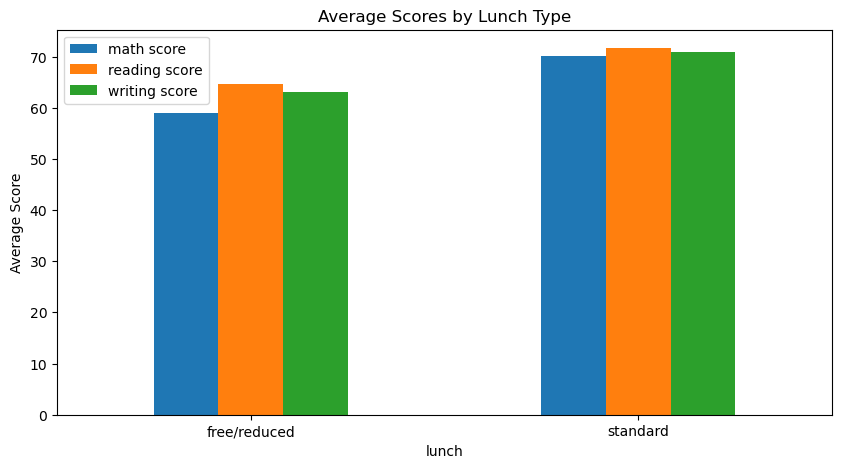

In [30]:
lunch_stats = df.groupby('lunch')[['math score', 'reading score', 'writing score']].mean()
lunch_stats.plot(kind='bar', figsize=(10, 5))
plt.title('Average Scores by Lunch Type')
plt.ylabel('Average Score')
plt.xticks(rotation=0)
plt.show()

# Question 5: Gender differences (handled carefully and respectfully)
## Analysis Steps:

* Group by Gender: Group the data by gender and calculate average scores.
Visualize:
* Use a grouped bar chart to compare scores across subjects by gender.

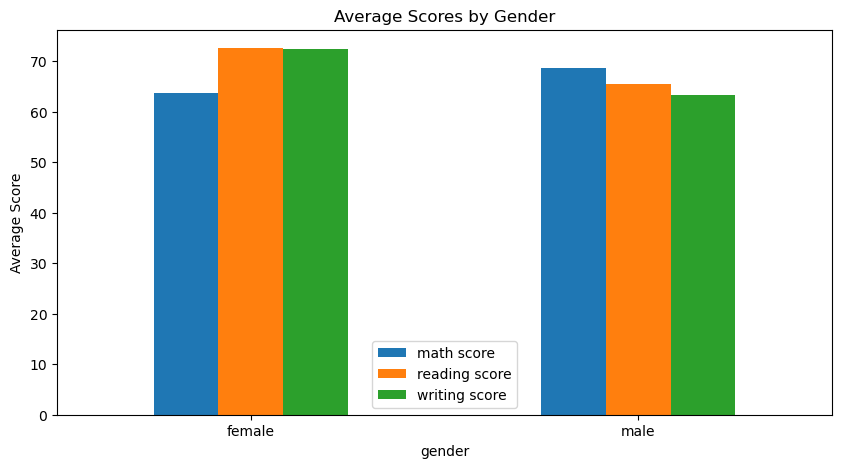

In [33]:
gender_stats = df.groupby('gender')[['math score', 'reading score', 'writing score']].mean()
gender_stats.plot(kind='bar', figsize=(10, 5))
plt.title('Average Scores by Gender')
plt.ylabel('Average Score')
plt.xticks(rotation=0)
plt.show()

# Findings on Student Performance Analysis

## 1. Impact of Test Preparation on Scores
The analysis revealed that students who completed a test preparation course achieved higher average scores across all subjects compared to their peers who did not participate in such courses. This finding suggests that test preparation may contribute significantly to enhancing students' academic performance, as evidenced by the elevated scores in mathematics, reading, and writing.

## 2. Performance Gaps Across Subjects
An examination of average scores across subjects indicated that reading scores were the highest, followed closely by writing and mathematics. While the scores in all three subjects were roughly comparable, this trend highlights a distinct proficiency in reading among the student population, suggesting that students may engage more with reading materials or benefit from more effective instructional strategies in this area.

## 3. Correlation Between Parental Education Level and Student Performance
The analysis of parental education levels revealed a noteworthy trend: students whose parents had completed a bachelor's degree, a master's degree, or attended some college consistently achieved higher minimum scores across all subjects. This finding suggests a potential correlation between parental educational attainment and student performance. However, it is essential to note that the overall distribution of scores exhibited considerable randomness, implying that other factors may also play a role in determining academic success.

## 4. Socio-Economic Status as Reflected by Lunch Type
The study found that students who reported having a standard lunch had higher average scores compared to those receiving free or reduced lunch. This disparity likely reflects broader socio-economic factors, where students with access to standard lunch programs may experience a more stable and supportive home environment, contributing to their academic achievements.

## 5. Gender Differences in Academic Performance
Analysis of scores differentiated by gender illustrated that males demonstrated a higher average in mathematics, while females outperformed males in reading and writing. This observation underscores the importance of considering gender-based differences in educational outcomes, suggesting that instructional practices may need to be tailored to address the distinct needs and strengths of each gender group in academic settings.



These findings shed light on various aspects of student performance and indicate potential areas for further investigation. Future research could explore the impact of socio-economic factors, gender-specific educational strategies, and the effectiveness of test preparation programs in greater depth.